# Read All Data

In [14]:
import pandas as pd

# Path to your large CSV file
file_path = 'usa_00004.csv'

# Load the file in chunks to handle large files efficiently
chunk_size = 100000  # Adjust the chunk size based on your system's memory

# Create an empty dictionary to store dataframes by year
data_by_year = {}

# Read the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Group rows by the 'YEAR' column
    for year, data in chunk.groupby('YEAR'):
        if year not in data_by_year:
            data_by_year[year] = data
        else:
            data_by_year[year] = pd.concat([data_by_year[year], data], ignore_index=True)

# Save each year's data to a separate CSV file
for year, data in data_by_year.items():
    output_path = f'year_{year}.csv'
    data.to_csv(output_path, index=False)
    print(f"Saved: {output_path}")


Saved: year_1970.csv
Saved: year_1980.csv
Saved: year_1990.csv
Saved: year_2000.csv
Saved: year_2001.csv
Saved: year_2002.csv
Saved: year_2003.csv
Saved: year_2004.csv
Saved: year_2005.csv
Saved: year_2006.csv
Saved: year_2007.csv
Saved: year_2008.csv
Saved: year_2009.csv
Saved: year_2010.csv
Saved: year_2011.csv
Saved: year_2012.csv
Saved: year_2013.csv
Saved: year_2014.csv
Saved: year_2015.csv
Saved: year_2016.csv
Saved: year_2017.csv
Saved: year_2018.csv
Saved: year_2019.csv
Saved: year_2020.csv
Saved: year_2021.csv
Saved: year_2022.csv
Saved: year_2023.csv


In [15]:
import pandas as pd

file_path = 'usa_00004.csv'
data = pd.read_csv(file_path, nrows=10)

len(data.columns) , data.columns

(2, Index(['YEAR', 'RENTGRS'], dtype='object'))

# Convert Data To Yearly Files

In [ ]:
# unique_years = data['YEAR'].unique()
# for year in unique_years:
#     yearly_data = data[data['YEAR'] == year]
    
#     # CSV
#     csv_file = f"data_{year}.csv"
#     yearly_data.to_csv(csv_file, index=False)
    
#     # Parquet
#     parquet_file = f"data_{year}.parquet"
#     yearly_data.to_parquet(parquet_file, index=False)

# Main

## Data Dictionary

- **YEAR**: 4-digit numeric  
- **HHWT**: 6-digit numeric  
- **GQ**: 1-digit  
- **STATEFIP**: `99`: State not identified  
- **OWNERSHP**: '0' : N/A
- **RENT**: `0000`: N/A, `0001`: No cash rent (1980–1990), `9998`: Missing (1940), `9999`: No cash rent (1940)  
- **COSTELEC**: 
    - `0000` = N/A
    - `0002` = $1 or $2 (2000)
    - `9993` = No charge or no electricity used (1990, 2000, 2003-onward ACS/PRCS)
    - `9994` = Electricity not used (1970, 1980)
    - `9995` = Electricity included in rent or no charge (1980)
    - `9996` = Electricity included in rent (1970)
    - `9997` = Electricity included in rent or in condo fee (1990, 2000, 2003-onward ACS/PRCS)
    - `9998` = No charge, no electricity used, or electricity included in rent or condo fee (2000-2002 ACS) 
- **COSTGAS**: 
    - `0000` = N/A
    - `0002` = $1 or $2 (2000)
    - `9992` = Included in electricity payment (2003-onward ACS/PRCS)
    - `9993` = No charge or no gas used (1990, 2000, 2003-onward ACS/PRCS)
    - `9994` = Gas not used (1970, 1980)
    - `9995` = Gas included in rent or no charge (1980)
    - `9996` = Gas included in rent (1970)
    - `9997` = Gas included in rent or in condo fee (1990, 2000, 2003-onward ACS/PRCS)
    - `9998` = No charge, none used, or gas included in rent, condo fee, or electricity payment (2000-2002 ACS)
- **COSTGAS**: 
    - `0000` = N/A
    - `0002` = $1 or $2 (2000)
    - `9993` = No charge or no used (1990, 2000, 2003-onward ACS/PRCS)
    - `9995` = Water included in rent or no charge (1970, 1980)
    - `9997` = Water included in rent or in condo fee (1990, 2000, 2003-onward ACS/PRCS)
    - `9998` = No charge, none used, or water included in rent or condo fee (2000-2002 ACS)
- **COSTWATR**: 
    - `0000` = N/A
    - `0002` = $1 or $2 (2000)
    - `9993` = No charge or no used (1990, 2000, 2003-onward ACS/PRCS)
    - `9995` = Water included in rent or no charge (1970, 1980)
    - `9997` = Water included in rent or in condo fee (1990, 2000, 2003-onward ACS/PRCS)
    - `9998` = No charge, none used, or water included in rent or condo fee (2000-2002 ACS)
- **COSTFUEL**:
    - `0000` = N/A
    - `0002` = $1 or $2 (2000)
    - `9993` = No charge or no solid or liquid fuel used (1990, 2000, 2003-onward ACS/PRCS)
    - `9994` = Fuel not used (1970, 1980)
    - `9995` = Fuel included in rent or no charge (1980)
    - `9996` = Fuel included in rent (1970)
    - `9997` = Fuel included in rent or in condo fee (1990, 2000, 2003-onward ACS/PRCS)
    - `9998` = No charge, no fuel used, or fuel included in rent or condo fee (2000-2002 ACS)
- **VALUEH**: `0000000`: N/A (1930), `9999998`: Missing (1940 100%), `9999999`: Missing (1930), N/A (1940–2000, ACS, PRCS)  
- **VACANCY**: `0` = N/A
- **KITCHEN**: `0` = N/A
- **ROOMS**: `0` = N/A
- **PLUMBING**: `0` = N/A
- **UNITSSTR**: `0` = N/A
- **PHONE**: `0` = N/A
- **NFAMS**: 2-digit numeric
- **CBNSUBFAM**: 1-digit numeric
- **PERNUM**: 4-digit numeric 
- **PERWT**: 6-digit numeric  
- **NCHILD**: 1-digit numeric  
- **YNGCH**: `99` = N/A 
- **SEX**: `9`: Missing/blank  
- **AGE**: `999`: Missing  
- **MARST**: `9`: Blank, missing  
- **BIRTHYR**: `9996`: Not classified, `9997`: Illegible, `9998`: Unknown, `9999`: Missing/blank  
- **RACE**: 1-digit numeric  
- **RACED**: ??  
- **BPL**: `997`: Unknown, `999`: Missing/blank  
- **BPLD**: ??  
- **SCHOOL**: `0`: N/A, `8`: Unknown, `9`: Missing  
- **EDUC**: `99`: Missing  
- **EDUCD**: ?
- **EMPSTAT**: `0`: N/A  
- **EMPSTATD**: ??  
- **CLASSWKR**: `0`: N/A  
- **CLASSWKRD**: ?
- **INCTOT**: `9999999`: N/A, `9999998`: Unknown  
- **FTOTINC**: `9999998`: Not ascertained (1950), `9999999`: N/A  
- **POVERTY**: `000`: N/A  
- **OCCSCORE**: `00`: N/A  
- **ERSCOR50**: `9999`: N/A  
- **NPBOSS50**: `9999`: N/A  
- **VETSTAT**: `0` = N/A, `9` = N/A 
- **CARPOOL**: `0`: N/A 
- **RIDERS**: `0`: N/A 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Create a dictionary to track missing indicators for each column
missing_indicators = {
    'YEAR': [],
    'HHWT': [],
    'GQ': [],
    'STATEFIP': [99],
    'OWNERSHP': [0],
    # 'RENT': [0, 1, '0001', '0000'],
    'RENT': [0, 1],
    'RENTGRS': [0],
    'COSTELEC': [0, '0000', 2, '0002', 9993, '9993', 9994, '9994', 9995, '9995', 9996, '9996', 9997, '9997', 9998, '9998'],
    'COSTGAS': [0, '0000', 2, '0002', 9992, '9992', 9993, '9993', 9994, '9994', 9995, '9995', 9996, '9996', 9997, '9997', 9998, '9998'],
    'COSTWATR': [0, '0000', 2, '0002', 9993, '9993', 9995, '9995', 9997, '9997', 9998, '9998'],
    'COSTFUEL': [0, '0000', 2, '0002', 9993, '9993', 9994, '9994', 9995, '9995', 9996, '9996', 9997, '9997', 9998, '9998'],
    'VALUEH': [0, '0000000', 9999998, '9999998', 9999999, '9999999'],
    'VACANCY': [0],
    'KITCHEN': [0],
    'ROOMS': [0],
    'PLUMBING': [0],
    'UNITSSTR': [0],
    'PHONE': [0],
    'NFAMS': [],
    'CBNSUBFAM': [],
    'PERNUM': [],
    'PERWT': [],
    'NCHILD': [],
    'YNGCH': [99],
    'SEX': [9],
    'AGE': [999],
    'MARST': [9],
    'BIRTHYR': [9996, 9997, 9998, 9999],
    'RACE': [],
    'RACED': [],
    'BPL': [997, 999],
    'BPLD': [],
    'SCHOOL': [0, 8, 9],
    'EDUC': [99],
    'EDUCD': [],
    'EMPSTAT': [0],
    'EMPSTATD': [],
    'CLASSWKR': [0],
    'CLASSWKRD': [],
    'INCTOT': [9999999, 9999998],
    'FTOTINC': [9999998, 9999999],
    'POVERTY': [0],
    'OCCSCORE': [0],
    'ERSCOR50': [9999],
    'NPBOSS50': [9999],
    'VETSTAT': [0, 9],
    'CARPOOL': [0],
    'RIDERS': [0]
}


## One Year Analysis

In [12]:
file_path = 'Yearly Data\year_2007.csv'
df = pd.read_csv(file_path)

missing_percentages = {}

for column, indicators in missing_indicators.items():
    if column in df.columns:
        total_missing_explicit  = df[column].isin(indicators).sum()
        total_missing_nan = df[column].isna().sum()
        total_missing = total_missing_explicit + total_missing_nan
        total_rows = len(df[column])
        missing_percentages[column] = (total_missing / total_rows) * 100

for column, percentage in missing_percentages.items():
    print(f"{column}: {percentage:.2f}% missing")


YEAR: 0.00% missing
HHWT: 0.00% missing
GQ: 0.00% missing
STATEFIP: 0.00% missing
OWNERSHP: 2.71% missing
RENT: 78.32% missing
COSTELEC: 5.56% missing
COSTGAS: 41.53% missing
COSTWATR: 31.54% missing
COSTFUEL: 86.20% missing
VALUEH: 26.08% missing
VACANCY: 100.00% missing
KITCHEN: 2.71% missing
ROOMS: 2.71% missing
PLUMBING: 2.71% missing
UNITSSTR: 2.71% missing
PHONE: 2.71% missing
NFAMS: 0.00% missing
CBNSUBFAM: 0.00% missing
PERNUM: 0.00% missing
PERWT: 0.00% missing
NCHILD: 0.00% missing
YNGCH: 71.04% missing
SEX: 0.00% missing
AGE: 0.00% missing
MARST: 0.00% missing
BIRTHYR: 0.00% missing
RACE: 0.00% missing
RACED: 0.00% missing
BPL: 0.00% missing
BPLD: 0.00% missing
SCHOOL: 3.54% missing
EDUC: 0.00% missing
EDUCD: 0.00% missing
EMPSTAT: 20.51% missing
EMPSTATD: 0.00% missing
CLASSWKR: 40.34% missing
CLASSWKRD: 0.00% missing
INCTOT: 19.07% missing
FTOTINC: 2.85% missing
POVERTY: 2.85% missing
OCCSCORE: 40.34% missing
ERSCOR50: 0.00% missing
NPBOSS50: 0.00% missing
VETSTAT: 21.98% 

## All Year Analysis


Year: 1970
YEAR: 0.00% missing
RENTGRS: 72.17% missing

Year: 1980
YEAR: 0.00% missing
RENTGRS: 73.80% missing

Year: 1990
YEAR: 0.00% missing
RENTGRS: 72.81% missing

Year: 2000
YEAR: 0.00% missing
RENTGRS: 75.52% missing

Year: 2001
YEAR: 0.00% missing
RENTGRS: 76.61% missing

Year: 2002
YEAR: 0.00% missing
RENTGRS: 77.52% missing

Year: 2003
YEAR: 0.00% missing
RENTGRS: 77.69% missing

Year: 2004
YEAR: 0.00% missing
RENTGRS: 78.13% missing

Year: 2005
YEAR: 0.00% missing
RENTGRS: 78.00% missing

Year: 2006
YEAR: 0.00% missing
RENTGRS: 78.31% missing

Year: 2007
YEAR: 0.00% missing
RENTGRS: 78.32% missing

Year: 2008
YEAR: 0.00% missing
RENTGRS: 77.34% missing

Year: 2009
YEAR: 0.00% missing
RENTGRS: 76.51% missing

Year: 2010
YEAR: 0.00% missing
RENTGRS: 75.28% missing

Year: 2011
YEAR: 0.00% missing
RENTGRS: 75.09% missing

Year: 2012
YEAR: 0.00% missing
RENTGRS: 74.63% missing

Year: 2013
YEAR: 0.00% missing
RENTGRS: 74.44% missing

Year: 2014
YEAR: 0.00% missing
RENTGRS: 74.11% 

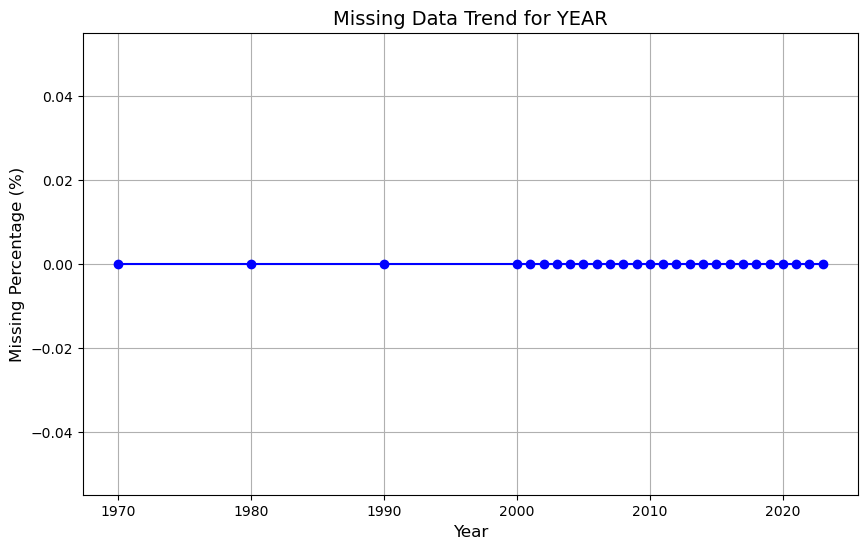

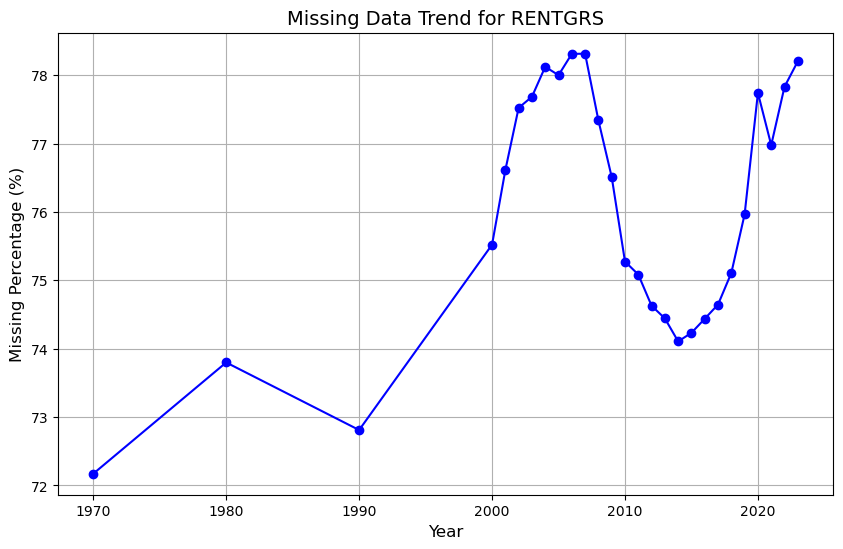

In [ ]:
yearly_missing_data = {}

folder_path = 'Yearly Data/'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        year = file_name.split('_')[1].split('.')[0]
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        missing_percentages = {}
        for column, indicators in missing_indicators.items():
            if column in df.columns:
                total_missing_explicit = df[column].isin(indicators).sum()
                total_missing_nan = df[column].isna().sum()
                total_missing = total_missing_explicit + total_missing_nan
                total_rows = len(df[column])
                missing_percentages[column] = (total_missing / total_rows) * 100

        yearly_missing_data[year] = missing_percentages

for year, percentages in yearly_missing_data.items():
    print(f"\nYear: {year}")
    for column, percentage in percentages.items():
        print(f"{column}: {percentage:.2f}% missing")

for column in missing_indicators.keys():
    years = []
    percentages = []
    for year, data in yearly_missing_data.items():
        if column in data:
            years.append(int(year))
            percentages.append(data[column])

    if len(years) == 0:
        continue

    sorted_years, sorted_percentages = zip(*sorted(zip(years, percentages)))

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_years, sorted_percentages, marker='o', linestyle='-', color='b')
    plt.title(f"Missing Data Trend for {column}", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Missing Percentage (%)", fontsize=12)
    plt.grid(True)
    plt.savefig(f"{column}_missing_trend.png")
    plt.show()

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def analyze_missing_data(folder_path, missing_indicators):
    """
    Analyze the percentage of missing data for each feature in yearly CSV files.

    Parameters:
    - folder_path (str): Path to the folder containing yearly CSV files.
    - missing_indicators (dict): Dictionary of missing value indicators for each feature.

    Returns:
    - yearly_missing_data (dict): Dictionary with years as keys and feature-wise missing percentages as values.
    """
    yearly_missing_data = {}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            year = file_name.split('_')[1].split('.')[0]
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)

            missing_percentages = {}
            for column, indicators in missing_indicators.items():
                if column in df.columns:
                    total_missing_explicit = df[column].isin(indicators).sum()
                    total_missing_nan = df[column].isna().sum()
                    total_missing = total_missing_explicit + total_missing_nan
                    total_rows = len(df[column])
                    missing_percentages[column] = (total_missing / total_rows) * 100

            yearly_missing_data[year] = missing_percentages

    # Print missing percentages for each year
    for year, percentages in yearly_missing_data.items():
        print(f"\nYear: {year}")
        for column, percentage in percentages.items():
            print(f"{column}: {percentage:.2f}% missing")

    # Plot missing data trends for each feature
    for column in missing_indicators.keys():
        years = []
        percentages = []
        for year, data in yearly_missing_data.items():
            if column in data:
                years.append(int(year))
                percentages.append(data[column])

        if len(years) == 0:
            continue

        sorted_years, sorted_percentages = zip(*sorted(zip(years, percentages)))

        plt.figure(figsize=(10, 6))
        plt.plot(sorted_years, sorted_percentages, marker='o', linestyle='-', color='b')
        plt.title(f"Missing Data Trend for {column}", fontsize=14)
        plt.xlabel("Year", fontsize=12)
        plt.ylabel("Missing Percentage (%)", fontsize=12)
        plt.grid(True)
        plt.savefig(f"{column}_missing_trend.png")
        plt.show()

    return yearly_missing_data


In [ ]:
folder_path = 'Yearly Data/'
yearly_missing_data_before = analyze_missing_data(folder_path, missing_indicators)

## Process Data

In [ ]:
import pandas as pd
import os

def process_data(folder_path, missing_indicators, features_to_remove, preserve_features):
    """
    Process datasets to drop specified features and remove rows with missing values
    in features to keep.

    Parameters:
    - folder_path (str): Path to the folder containing yearly CSV files.
    - missing_indicators (dict): Dictionary of missing value indicators for each feature.
    - features_to_remove (list): Features to drop entirely.
    - preserve_features (list): Features to keep; rows with missing values in these features will be removed.

    Returns:
    - remaining_samples_per_year (dict): Dictionary with years as keys and remaining sample counts as values.
    """
    remaining_samples_per_year = {}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            year = file_name.split('_')[1].split('.')[0]
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)

            # Step 1: Drop features to remove
            df = df.drop(columns=features_to_remove, errors='ignore')

            # Step 2: Drop rows with missing data in features to keep
            for column in preserve_features:
                if column in df.columns:
                    df = df[~df[column].isin(missing_indicators.get(column, [])) & df[column].notna()]

            # Update the count of remaining samples
            remaining_samples_per_year[year] = len(df)

    return remaining_samples_per_year

folder_path = 'Yearly Data/'
features_to_remove = ['COSTELEC', 'COSTGAS']
preserve_features = ['INCTOT', 'EDUC']        # Features to keep and no missing values (Drop missing rows)

remaining_samples = process_data(
    folder_path,
    missing_indicators,
    features_to_remove,
    preserve_features
)

for year, count in remaining_samples.items():
    print(f"Year: {year}, Remaining Samples: {count}")


NameError: name 'missing_indicators' is not defined